In [37]:
# !pip install swifter
# !pip install kagglehub
# !pip install underthesea
# !pip install tabulate

Corpus Dataset: [KaggleHub - Pham Tuyet](https://www.kaggle.com/datasets/phamtuyet/text-classification?select=text_tokenizer.xlsx)

Stopword Dataset: [KaggleHub - L3VIEVIL](https://www.kaggle.com/datasets/linhlpv/vietnamese-stopwords)

In [38]:
from datasets import load_dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from underthesea import word_tokenize
import kagglehub
import numpy as np
import os
from tqdm.auto import tqdm
import warnings 
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

stopword_path = kagglehub.dataset_download("linhlpv/vietnamese-stopwords")
from sklearn.feature_extraction.text import TfidfVectorizer










In [39]:
# Load the UIT-VSFC dataset 
print("Loading UIT-VSFC dataset from Hugging Face...")
vsfc_dataset = load_dataset("uitnlp/vietnamese_students_feedback")
print("Dataset loaded.")

# combine train, validation, and test splits into one DataFrame
vn_df = pd.concat([
    vsfc_dataset['train'].to_pandas(),
    vsfc_dataset['validation'].to_pandas(),
    vsfc_dataset['test'].to_pandas()
]).reset_index(drop=True)


# Load Stopword
stopword_df = pd.read_csv(f'{stopword_path}/vietnamese-stopwords.txt', header=None, names=['word'])
vietnamese_stopwords_set = set(stopword_df['word'].tolist())
print(f"\nLoaded {len(vietnamese_stopwords_set)} stopwords into a set.")

Loading UIT-VSFC dataset from Hugging Face...
Dataset loaded.

Loaded 1942 stopwords into a set.


In [40]:
vn_df.head()

,sentence,sentiment,topic
0,slide giáo trình đầy đủ .,2,1
1,"nhiệt tình giảng dạy , gần gũi với sinh viên .",2,0
2,đi học đầy đủ full điểm chuyên cần .,0,1
3,chưa áp dụng công nghệ thông tin và các thiết ...,0,0
4,"thầy giảng bài hay , có nhiều bài tập ví dụ ng...",2,0


In [41]:
stopword_df.head()

,word
0,a lô
1,a ha
2,ai
3,ai ai
4,ai nấy


## Question 1

Loading cached results from pkl_folder/task1_vsfc.pkl...
Results loaded.

--- Stopword Proportion by Category (UIT-VSFC Topics) [Task 1] ---
| Category         |   total_tokens |   stopword_tokens |   Stopword Proportion (%) |
|:-----------------|---------------:|------------------:|--------------------------:|
| lecturer         |         123554 |             52954 |                     42.86 |
| training_program |          39533 |             20101 |                     50.85 |
| facility         |           9513 |              3969 |                     41.72 |
| others           |           6661 |              3417 |                     51.30 |


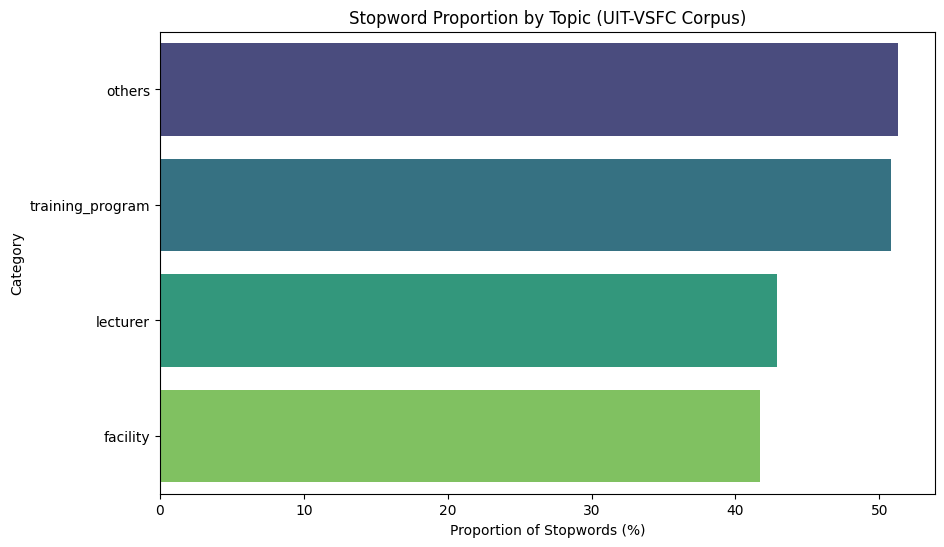

In [42]:
import pickle 

# Define filename for caching
TASK1_STATS_PKL = 'pkl_folder/task1_vsfc.pkl' 

# Check if cached file exists
if os.path.exists(TASK1_STATS_PKL):
    # Load from cache if found
    print(f"Loading cached results from {TASK1_STATS_PKL}...")
    with open(TASK1_STATS_PKL, 'rb') as f:
        stats_df = pickle.load(f)
    print("Results loaded.")
    
else:
    # Run analysis if cache not found
    print(f"Cache not found. Running Task 1 analysis...")

    # Ensure stopwords are loaded as a set (assumes stopword_df exists)
    vietnamese_stopwords_set = set(stopword_df['word'].tolist())

    # Define function to count tokens and stopwords
    def process_text(text):
        tokens = word_tokenize(str(text).lower())
        stopword_count = sum(1 for token in tokens if token in vietnamese_stopwords_set)
        return pd.Series({'total_tokens': len(tokens), 'stopword_tokens': stopword_count})

    # Apply function with progress bar (assumes vn_df exists)
    print("Tokenizing sentences...")
    token_counts_df = vn_df['sentence'].progress_apply(process_text) 

    # Combine counts with topic labels
    CATEGORY_COLUMN = 'topic' 
    results_df = pd.concat([vn_df[CATEGORY_COLUMN], token_counts_df], axis=1)

    # Aggregate by topic
    stats_df = results_df.groupby(CATEGORY_COLUMN).sum()

    # Calculate proportion
    stats_df['Stopword Proportion (%)'] = (stats_df['stopword_tokens'] / stats_df['total_tokens']) * 100

    # Map topic IDs to names
    topic_map = {0: 'lecturer', 1: 'training_program', 2: 'facility', 3: 'others'}
    stats_df = stats_df.reset_index().rename(columns={CATEGORY_COLUMN: 'Category_ID'})
    stats_df['Category'] = stats_df['Category_ID'].map(topic_map)
    
    # Save results to pickle file
    print(f"Analysis complete. Saving results to {TASK1_STATS_PKL}...")
    with open(TASK1_STATS_PKL, 'wb') as f:
        pickle.dump(stats_df, f)
    print("Results saved.")

# --- Display results ---

# Table (using markdown for clean output)
print("\n--- Stopword Proportion by Category (UIT-VSFC Topics) [Task 1] ---")
print(stats_df[['Category', 'total_tokens', 'stopword_tokens', 'Stopword Proportion (%)']].to_markdown(index=False, floatfmt=".2f"))

# Plot (assuming plt and sns exist)
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Stopword Proportion (%)', 
    y='Category', 
    data=stats_df.sort_values('Stopword Proportion (%)', ascending=False),
    palette='viridis'
)
plt.title('Stopword Proportion by Topic (UIT-VSFC Corpus)')
plt.xlabel('Proportion of Stopwords (%)')
plt.show()

## Question 2

Loading cached results from pkl_folder/task2_tfidf_stats.pkl...
Results loaded.

--- TF-IDF Stats (Lowest 15 Average TF-IDF) [Task 2] ---
| Stopword     |   Average TF-IDF |   Std Dev TF-IDF |   Max TF-IDF |   Min TF-IDF |
|:-------------|-----------------:|-----------------:|-------------:|-------------:|
| trước đó     |           0.0000 |           0.0000 |       0.0000 |       0.0000 |
| mà không     |           0.0000 |           0.0000 |       0.0000 |       0.0000 |
| chỉ là       |           0.0000 |           0.0000 |       0.0000 |       0.0000 |
| đến đâu      |           0.0000 |           0.0000 |       0.0000 |       0.0000 |
| tự lượng     |           0.0000 |           0.0000 |       0.0000 |       0.0000 |
| chưa bao giờ |           0.0000 |           0.0000 |       0.0000 |       0.0000 |
| có ngày      |           0.0000 |           0.0000 |       0.0000 |       0.0000 |
| theo tin     |           0.0000 |           0.0000 |       0.0000 |       0.0000 |
| phải khi  

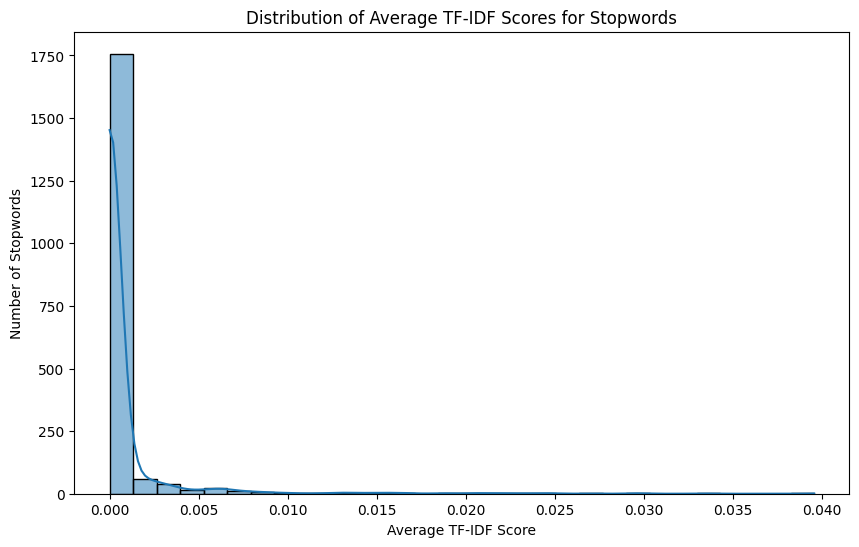

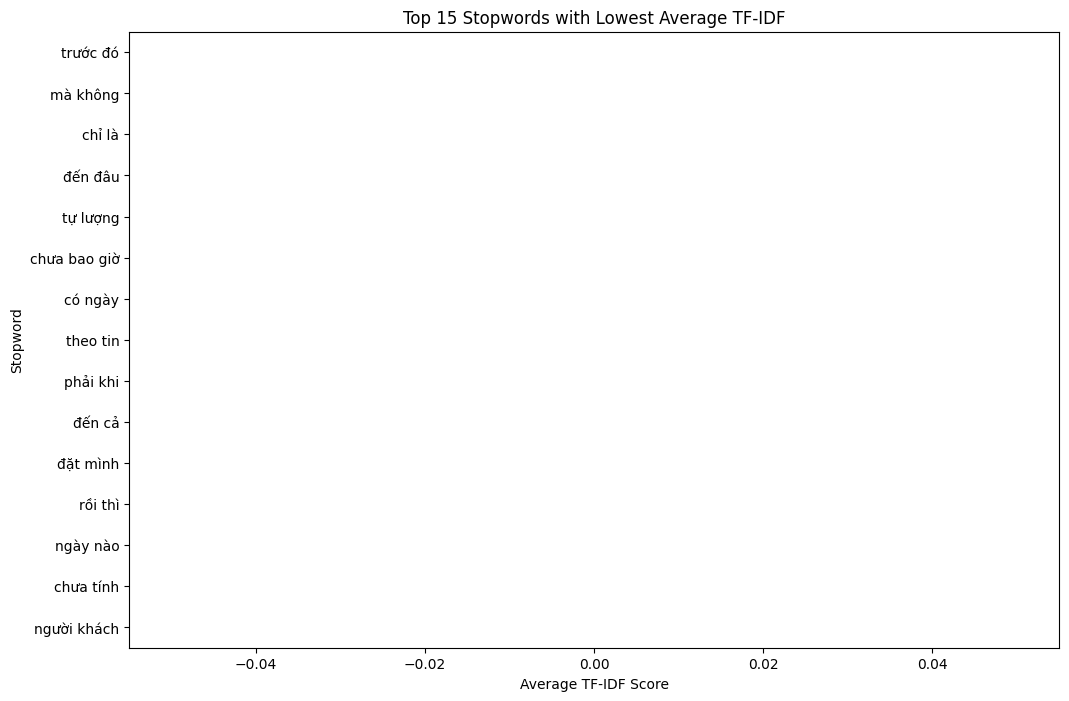

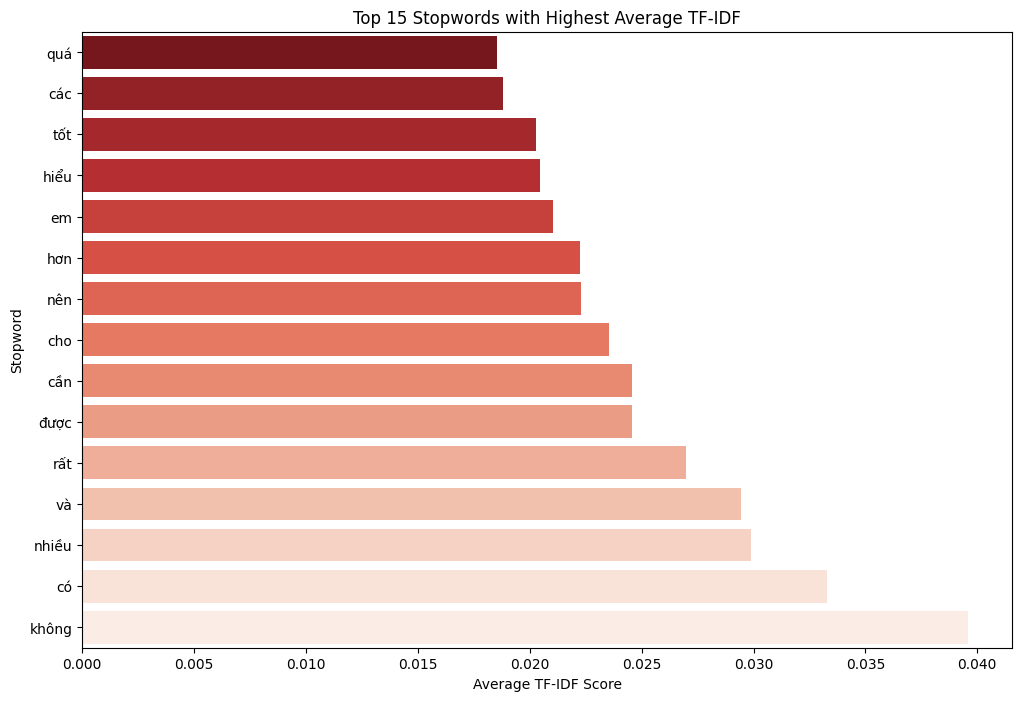

In [43]:
# Define filename for caching Task 2 results
TASK2_TFIDF_PKL = 'pkl_folder/task2_tfidf_stats.pkl'

# Check if cached results exist
if os.path.exists(TASK2_TFIDF_PKL):
    print(f"Loading cached results from {TASK2_TFIDF_PKL}...")
    with open(TASK2_TFIDF_PKL, 'rb') as f:
        tfidf_stats_df = pickle.load(f)
    print("Results loaded.")

else:
    print(f"Cache not found. Running Task 2 analysis...")

    # Ensure stopwords set is loaded (assumes vietnamese_stopwords_set exists)
    if 'vietnamese_stopwords_set' not in locals():
         vietnamese_stopwords_set = set(stopword_df['word'].tolist())

    # Prepare data structures
    categories = vn_df['topic'].unique()
    # Store scores: {stopword: [score_cat0, score_cat1,...]}
    stopword_tfidf_scores = {word: [] for word in vietnamese_stopwords_set}

    # Define tokenizer using underthesea
    def vn_tokenizer(text):
        # Lemmatization skipped for simplicity (required by project spec)
        return word_tokenize(str(text).lower())

    # Calculate TF-IDF per category
    print("Calculating TF-IDF for each category...")
    for category in tqdm(categories, desc="Processing Categories"):
        category_texts = vn_df[vn_df['topic'] == category]['sentence'].tolist()

        # Fit TF-IDF on texts for this category ONLY, keeping stopwords
        tfidf_vectorizer = TfidfVectorizer(tokenizer=vn_tokenizer, stop_words=None)

        try:
            tfidf_matrix = tfidf_vectorizer.fit_transform(category_texts)
            feature_names = tfidf_vectorizer.get_feature_names_out()
            vocab_index = {word: idx for idx, word in enumerate(feature_names)}

            # Get average TF-IDF for stopwords in this category
            for stopword in vietnamese_stopwords_set:
                if stopword in vocab_index:
                    stopword_idx = vocab_index[stopword]
                    # Calculate mean score across docs in this category
                    avg_score = np.mean(tfidf_matrix[:, stopword_idx].toarray())
                    stopword_tfidf_scores[stopword].append(avg_score)
                else:
                    stopword_tfidf_scores[stopword].append(0.0) # Score is 0 if not present

        except ValueError as e: # Handle empty categories
            print(f"Skipping category {category} due to error: {e}")
            for stopword in vietnamese_stopwords_set:
                 stopword_tfidf_scores[stopword].append(0.0)

    # Calculate statistics across categories
    print("Calculating TF-IDF statistics...")
    tfidf_stats = []
    for stopword, scores in stopword_tfidf_scores.items():
        # Calculate stats if scores list is not empty
        if scores:
            tfidf_stats.append({
                'Stopword': stopword,
                'Average TF-IDF': np.mean(scores),
                'Std Dev TF-IDF': np.std(scores),
                'Max TF-IDF': np.max(scores),
                'Min TF-IDF': np.min(scores)
            })
        else: # Handle stopwords that never appeared
             tfidf_stats.append({ 'Stopword': stopword, 'Average TF-IDF': 0.0,
                                  'Std Dev TF-IDF': 0.0, 'Max TF-IDF': 0.0, 'Min TF-IDF': 0.0 })

    # Convert stats list to DataFrame
    tfidf_stats_df = pd.DataFrame(tfidf_stats)

    # Save results to pickle file
    print(f"Analysis complete. Saving results to {TASK2_TFIDF_PKL}...")
    with open(TASK2_TFIDF_PKL, 'wb') as f:
        pickle.dump(tfidf_stats_df, f)
    print("Results saved.")

# --- Display results ---

# Sort DataFrame by Average TF-IDF
tfidf_stats_df_sorted = tfidf_stats_df.sort_values('Average TF-IDF')

# Display top/bottom 15 stopwords in tables
print("\n--- TF-IDF Stats (Lowest 15 Average TF-IDF) [Task 2] ---")
print(tfidf_stats_df_sorted.head(15).to_markdown(index=False, floatfmt=".4f"))

print("\n--- TF-IDF Stats (Highest 15 Average TF-IDF) [Task 2] ---")
print(tfidf_stats_df_sorted.tail(15).to_markdown(index=False, floatfmt=".4f"))

# Plot distribution of average scores
plt.figure(figsize=(10, 6))
sns.histplot(tfidf_stats_df['Average TF-IDF'], bins=30, kde=True)
plt.title('Distribution of Average TF-IDF Scores for Stopwords')
plt.xlabel('Average TF-IDF Score')
plt.ylabel('Number of Stopwords')
plt.show()

# Plot Top 15 Lowest Average TF-IDF
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Average TF-IDF',
    y='Stopword',
    data=tfidf_stats_df_sorted.head(15),
    palette='Blues_r'
)
plt.title('Top 15 Stopwords with Lowest Average TF-IDF')
plt.xlabel('Average TF-IDF Score')
plt.ylabel('Stopword')
plt.show()

# Plot Top 15 Highest Average TF-IDF
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Average TF-IDF',
    y='Stopword',
    data=tfidf_stats_df_sorted.tail(15),
    palette='Reds_r'
)
plt.title('Top 15 Stopwords with Highest Average TF-IDF')
plt.xlabel('Average TF-IDF Score')
plt.ylabel('Stopword')
plt.show()